## **Group 9 / LDA Project / Humand Development Index (HDI) Dataset**

--------------------------------------------------

# **Part 1:** HDI Dataset EDA & Data Cleaning

In [55]:
#Importing useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as stats
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [56]:
#Importing Dataset into DataFrame df 

df = pd.read_csv('c:\\Users\pc\Desktop\HDI DATA.csv')

In [57]:
df.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),Human Development Index (1995),Human Development Index (1996),Human Development Index (1997),Human Development Index (1998),Human Development Index (1999),Human Development Index (2000),Human Development Index (2001),Human Development Index (2002),Human Development Index (2003),Human Development Index (2004),Human Development Index (2005),Human Development Index (2006),Human Development Index (2007),Human Development Index (2008),Human Development Index (2009),Human Development Index (2010),Human Development Index (2011),Human Development Index (2012),Human Development Index (2013),Human Development Index (2014),Human Development Index (2015),Human Development Index (2016),Human Development Index (2017),Human Development Index (2018),Human Development Index (2019),Human Development Index (2020),Human Development Index (2021),Life Expectancy at Birth (1990),Life Expectancy at Birth (1991),Life Expectancy at Birth (1992),Life Expectancy at Birth (1993),Life Expectancy at Birth (1994),Life Expectancy at Birth (1995),Life Expectancy at Birth (1996),Life Expectancy at Birth (1997),Life Expectancy at Birth (1998),Life Expectancy at Birth (1999),Life Expectancy at Birth (2000),Life Expectancy at Birth (2001),Life Expectancy at Birth (2002),Life Expectancy at Birth (2003),Life Expectancy at Birth (2004),Life Expectancy at Birth (2005),Life Expectancy at Birth (2006),Life Expectancy at Birth (2007),Life Expectancy at Birth (2008),Life Expectancy at Birth (2009),Life Expectancy at Birth (2010),Life Expectancy at Birth (2011),Life Expectancy at Birth (2012),Life Expectancy at Birth (2013),Life Expectancy at Birth (2014),Life Expectancy at Birth (2015),Life Expectancy at Birth (2016),Life Expectancy at Birth (2017),Life Expectancy at Birth (2018),Life Expectancy at Birth (2019),Life Expectancy at Birth (2020),Life Expectancy at Birth (2021),Expected Years of Schooling (1990),Expected Years of Schooling (1991),Expected Years of Schooling (1992),Expected Years of Schooling (1993),Expected Years of Schooling (1994),Expected Years of Schooling (1995),Expected Years of Schooling (1996),Expected Years of Schooling (1997),Expected Years of Schooling (1998),Expected Years of Schooling (1999),Expected Years of Schooling (2000),Expected Years of Schooling (2001),Expected Years of Schooling (2002),Expected Years of Schooling (2003),Expected Years of Schooling (2004),Expected Years of Schooling (2005),Expected Years of Schooling (2006),Expected Years of Schooling (2007),Expected Years of Schooling (2008),Expected Years of Schooling (2009),Expected Years of Schooling (2010),Expected Years of Schooling (2011),Expected Years of Schooling (2012),Expected Years of Schooling (2013),Expected Years of Schooling (2014),Expected Years of Schooling (2015),Expected Years of Schooling (2016),Expected Years of Schooling (2017),Expected Years of Schooling (2018),Expected Years of Schooling (2019),Expected Years of Schooling (2020),Expected Years of Schooling (2021),Mean Years of Schooling (1990),Mean Years of Schooling (1991),Mean Years of Schooling (1992),Mean Years of Schooling (1993),Mean Years of Schooling (1994),Mean Years of Schooling (1995),Mean Years of Schooling (1996),Mean Years of Schooling (1997),Mean Years of Schooling (1998),Mean Years of Schooling (1999),Mean Years of Schooling (2000),Mean Years of Schooling (2001),Mean Years of Schooling (2002),Mean Years of Schooling (2003),Mean Years of Schooling (2004),Mean Years of Schooling (2005),Mean Years of Schooling (2006),Mean Years of Schooling (2007),Mean Years of Schooling (2008),Mean Years of Schooling (2009),Mean Years of Schooling (2010),Mean Years of Schooling (2011),Mean Years of Schooling (2012),Mean Years of Schooling (2013),Mean Years of Schooling (2014),Mean Years

In [58]:
#General overview on dataset:

display(df.info())
display(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 880 entries, ISO3 to Material footprint per capita (tonnes) (2021)
dtypes: float64(876), object(4)
memory usage: 1.3+ MB


None

Index(['ISO3', 'Country', 'Human Development Groups',
       'UNDP Developing Regions', 'HDI Rank (2021)',
       'Human Development Index (1990)', 'Human Development Index (1991)',
       'Human Development Index (1992)', 'Human Development Index (1993)',
       'Human Development Index (1994)',
       ...
       'Material footprint per capita (tonnes) (2012)',
       'Material footprint per capita (tonnes) (2013)',
       'Material footprint per capita (tonnes) (2014)',
       'Material footprint per capita (tonnes) (2015)',
       'Material footprint per capita (tonnes) (2016)',
       'Material footprint per capita (tonnes) (2017)',
       'Material footprint per capita (tonnes) (2018)',
       'Material footprint per capita (tonnes) (2019)',
       'Material footprint per capita (tonnes) (2020)',
       'Material footprint per capita (tonnes) (2021)'],
      dtype='object', length=880)

- **Observation:**

- We see repetition of the same features across different years of data collection

In [59]:
#Function to filter dataframe with year

def extract_columns_with_year(df, word):
    # Using the filter method
    filtered_columns = df.filter(like=str(word))
    return filtered_columns

In [60]:
#Rename "Country" Column to "Country (2021)"

df = df.rename(columns={'Country': 'Country (2021)'})

#Rename "Human Development Index (2021)" to "HDI (2021)"

df = df.rename(columns={'Human Development Index (2021)': 'HDI (2021)'})

In [61]:
#New Dataframe df1 with data from 2021

df1 = extract_columns_with_year(df, 2021)

In [62]:
#Overview of df1

display(df1.info())
display(df1.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country (2021)                                                        195 non-null    object 
 1   HDI Rank (2021)                                                       191 non-null    float64
 2   HDI (2021)                                                            191 non-null    float64
 3   Life Expectancy at Birth (2021)                                       195 non-null    float64
 4   Expected Years of Schooling (2021)                                    193 non-null    float64
 5   Mean Years of Schooling (2021)                                        191 non-null    float64
 6   Gross National Income Per Capita (2021)                               193 non-null    float64
 7  

None

,count,mean,std,min,25%,50%,75%,max
HDI Rank (2021),191.0,95.811518,55.307333,1.000000,48.500000,96.000000,143.500000,191.000000
HDI (2021),191.0,0.720576,0.150661,0.385000,0.599500,0.739000,0.835000,0.962000
Life Expectancy at Birth (2021),195.0,71.276330,7.746488,52.525400,65.672500,71.694000,76.699300,85.946300
Expected Years of Schooling (2021),193.0,13.510846,2.918352,5.542510,11.549480,13.365385,15.599060,21.054590
Mean Years of Schooling (2021),191.0,8.986916,3.173693,2.114962,6.251659,9.306864,11.497702,14.090967
Gross National Income Per Capita (2021),193.0,20136.391499,21756.087342,731.786709,4566.303831,12306.341000,30027.291310,146829.700600
GDI Group (2021),172.0,2.453488,1.557153,1.000000,1.000000,2.000000,4.000000,5.000000
Gender Development Index (2021),172.0,0.947285,0.065906,0.496000,0.920000,0.967000,0.989000,1.034000
HDI female (2021),172.0,0.701938,0.164941,0.262570,0.577696,0.715770,0.829453,0.949900
"Life Expectancy at Birth, female (2021)",195.0,74.034113,7.879224,53.070100,68.454750,75.175200,79.702300,88.325700


In [63]:
#Creating new column for HDI Classification based on HDI index: 4 = Very High /  3 = High /  2 = Medium/  1 = Low

df1.loc[df1['HDI (2021)'] < 0.550, 'HDI Class'] = 1
df1.loc[(df1['HDI (2021)'] >= 0.550) & (df1['HDI (2021)'] <= 0.699) , 'HDI Class'] = 2
df1.loc[(df1['HDI (2021)'] > 0.7) & (df1['HDI (2021)'] <= 0.799) , 'HDI Class'] = 3
df1.loc[df1['HDI (2021)'] >= 0.8, 'HDI Class'] = 4

C:\Users\pc\AppData\Local\Temp\ipykernel_14008\477634173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['HDI (2021)'] < 0.550, 'HDI Class'] = 1


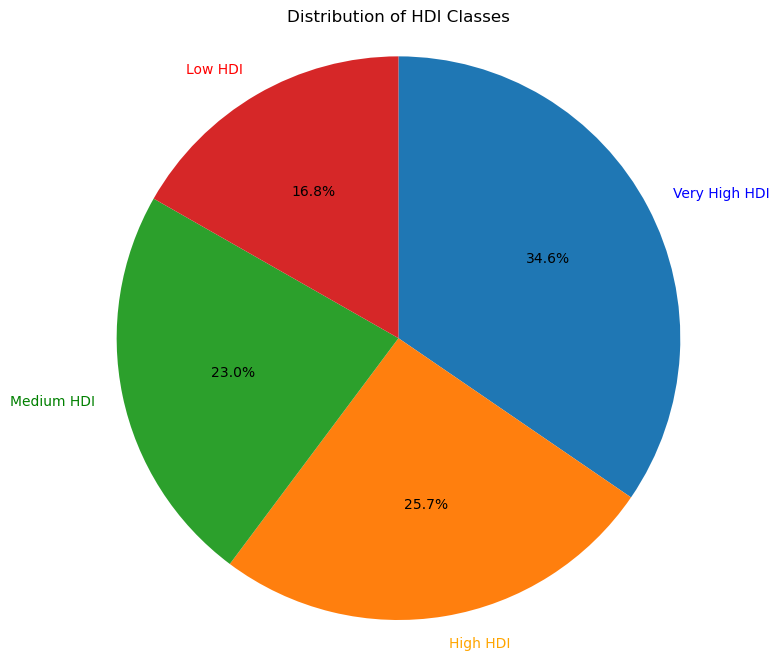

In [64]:
#Pie Chart for HDI Class

hdi_class_counts = df1['HDI Class'].value_counts()

custom_labels = ["Very High HDI", 'High HDI', 'Medium HDI', 'Low HDI']
label_colors = ['blue', 'orange', 'green', 'red']

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(hdi_class_counts, labels=custom_labels, autopct='%1.1f%%', startangle=90, counterclock=False)

for text, color in zip(texts, label_colors):
    text.set_color(color)

plt.axis('equal')
plt.title('Distribution of HDI Classes')

plt.show()


-----------------------------------------
- **Observation:**

- We can see that the HDI classes are fairly balanced which is good for LDA classification potential performance.

-----------------------------------------

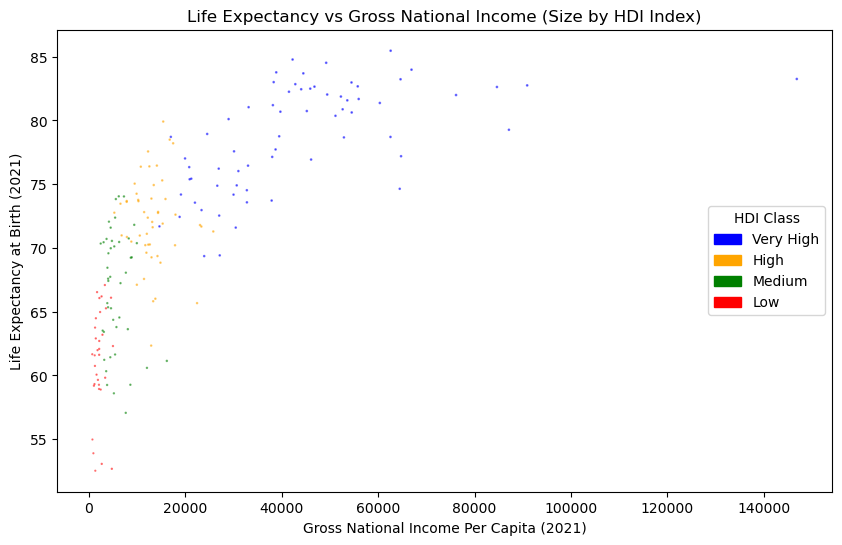

In [65]:
# Scatter plot Life Expectancy vs Gross National Income with size by HDI Index

color_map = {1: 'red', 2: 'green', 3: 'orange', 4:'blue'}
colors = df1['HDI Class'].map(color_map).fillna('grey')
colors = list(colors)

plt.figure(figsize=(10, 6))

plt.scatter(df1['Gross National Income Per Capita (2021)'], df1['Life Expectancy at Birth (2021)'], s=df1['HDI (2021)'], c=colors, alpha=0.5)

plt.xlabel('Gross National Income Per Capita (2021)')
plt.ylabel('Life Expectancy at Birth (2021)')
plt.title('Life Expectancy vs Gross National Income (Size by HDI Index)')

color_map_2 = {'Low': 'red', "Medium": 'green', "High": 'orange', "Very High":'blue'}
legend_labels = [mpatches.Patch(color=color, label=label) for label, color in reversed(list(color_map_2.items()))]
plt.legend(handles=legend_labels, title="HDI Class", loc='right')

# Show the plot
plt.show()


- **Observations**:

 &nbsp;

 

- There appears to be a positive correlation between "Gross National Income Per Capita" and "Life Expectancy at Birth."
- This suggests that as the gross national income per capita increases, life expectancy also tends to increase.

  &nbsp;

- The size of the points indicates the Human Development Index. Larger points denote higher HDI values, which generally correspond to higher income and life expectancy.
- This suggests a correlation between HDI and these two variables.

  &nbsp;

- The data points are more densely packed at the lower end of the income scale. This
- may suggest that a larger number of the countries or regions in the dataset have lower income per capita. The life expectancy also tends to be lower in these points.

  &nbsp;
  
- The distribution of life expectancy appears to be less spread out at higher income levels, whereas there is more variability in life expectancy at lower income levels. 
- This could imply that beyond a certain income threshold, increases in income have less impact on improving life expectancy

&nbsp;

In [66]:
#Checking Null Values in df1

print(f"Total number of missing values: {df1.isnull().sum().sum()}")

missing_percentage = (df1.isnull().sum().sum()) / (df1.shape[0] * df1.shape[1]) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

df1.isnull().sum()


Total number of missing values: 610
Percentage of missing values: 8.45%


Country (2021)                                                           0
HDI Rank (2021)                                                          4
HDI (2021)                                                               4
Life Expectancy at Birth (2021)                                          0
Expected Years of Schooling (2021)                                       2
Mean Years of Schooling (2021)                                           4
Gross National Income Per Capita (2021)                                  2
GDI Group (2021)                                                        23
Gender Development Index (2021)                                         23
HDI female (2021)                                                       23
Life Expectancy at Birth, female (2021)                                  0
Expected Years of Schooling, female (2021)                               6
Mean Years of Schooling, female (2021)                                  16
Gross National Income Per

In [67]:
#Extracting new dataframe with count of missing values for each country sorted by ascending order

missing_bool = df1.isnull()

missing_counts = missing_bool.sum(axis=1)

missing_summary = pd.DataFrame({'Country': df1['Country (2021)'], 'MissingCount': missing_counts})

if missing_summary['Country'].is_unique:
     
     missing_summary.set_index('Country', inplace=True)
else:
    print("Warning: 'Country' column has duplicates and cannot be set as index without dropping or aggregating duplicates.")

if missing_summary['MissingCount'].max() > (len(df.columns) - 1):
    print("Error: The maximum missing count exceeds the number of columns minus one.")

missing_summary_sorted = missing_summary.sort_values(by='MissingCount', ascending=False)

print(missing_summary_sorted)

                                      MissingCount
Country                                           
Monaco                                          31
Nauru                                           26
North Korea                                     23
Liechtenstein                                   22
Micronesia                                      22
Somalia                                         22
Dominica                                        22
Saint Kitts and Nevis                           22
Palau                                           21
Andorra                                         21
Grenada                                         21
Antigua and Barbuda                             21
San Marino                                      20
Marshall Islands                                19
Solomon Islands                                 17
Vanuatu                                         16
Kiribati                                        16
Tuvalu                         

In [68]:
#Extracting List of Countries with more than 10 missing values

small_nations = list(missing_summary[missing_summary['MissingCount']>5].index)

print(small_nations)

['Andorra', 'Antigua and Barbuda', 'Bahamas', 'Comoros', 'Cabo Verde', 'Djibouti', 'Dominica', 'Eritrea', 'Fiji', 'Micronesia', 'Equatorial Guinea', 'Grenada', 'Hong Kong', 'Kiribati', 'Saint Kitts and Nevis', 'Liechtenstein', 'Monaco', 'Marshall Islands', 'Nauru', 'Palau', 'North Korea', 'Palestine, State of', 'Solomon Islands', 'San Marino', 'Somalia', 'Seychelles', 'Trinidad and Tobago', 'Tuvalu', 'Saint Vincent and the Grenadines', 'Vanuatu']


In [69]:
#Changing df1 row index to country label

df1.set_index("Country (2021)",inplace=True )

In [70]:
# All countries with more than 10 missing values are countries with very small populations and have unique political and economic situations
# Therefor we will drop them from our Analysis

df1.drop(index=small_nations, inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_14008\1444715716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(index=small_nations, inplace=True)


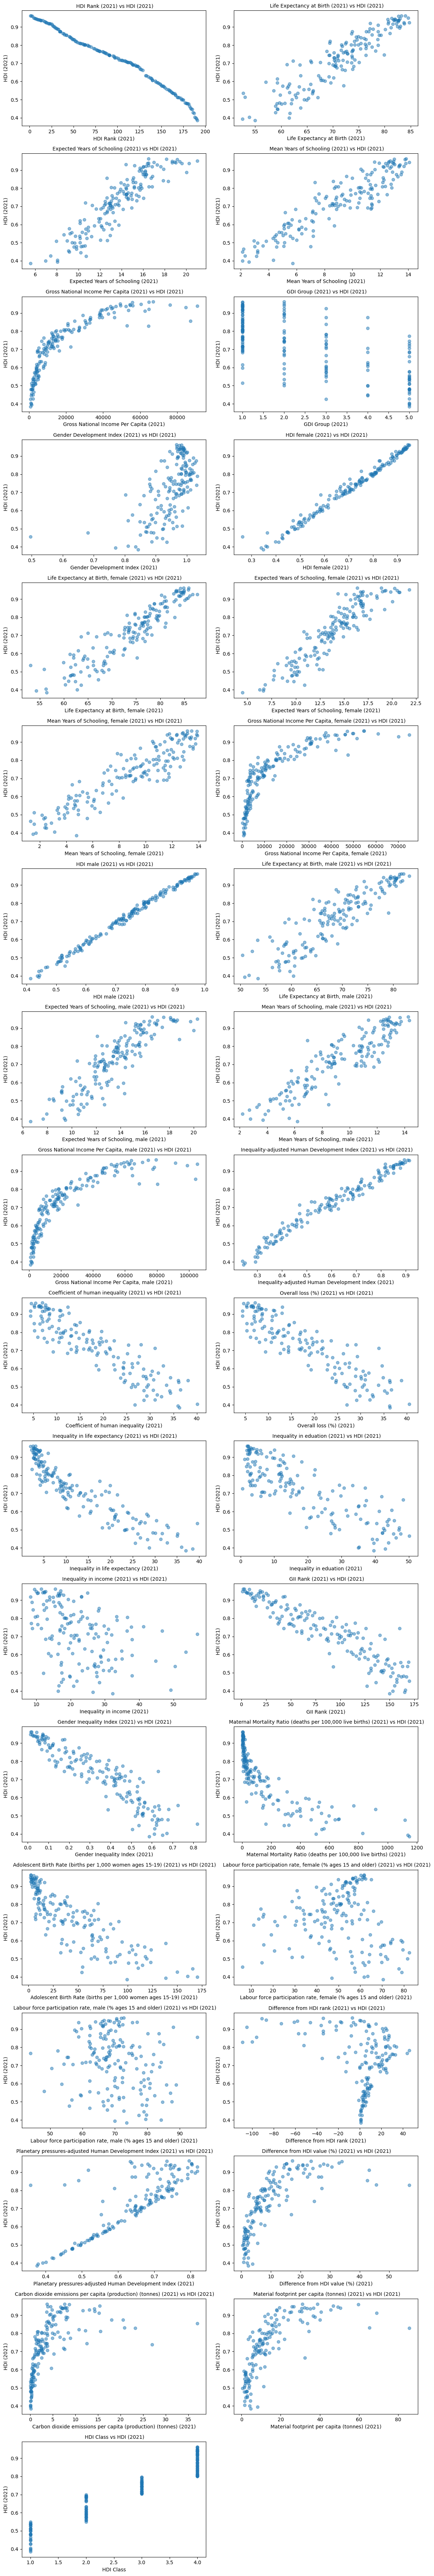

In [71]:
#Creating Scatter plots to display relationship of features with target variables

import matplotlib.pyplot as plt

features = df1.drop(columns="HDI (2021)")
target = "HDI (2021)"

num_features = len(features.columns)
num_rows = (num_features + 1) // 2  
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

for i, feature in enumerate(features.columns):
    ax = axes[i // 2, i % 2]
    ax.scatter(df1[feature], df1[target], alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel(target)
    ax.set_title(f' {feature} vs {target}', fontsize=10)

if num_features % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [72]:
#HDI Rank, HDI Male, HDI Female and HDI Group are highly correlated with HDI Score, therefor we drop them

df1.drop(columns=['HDI Rank (2021)','HDI female (2021)','HDI male (2021)', 'GDI Group (2021)'], inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_14008\2910243935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['HDI Rank (2021)','HDI female (2021)','HDI male (2021)', 'GDI Group (2021)'], inplace=True)


In [73]:
#Difference from HDI rank (2021)  and Difference from HDI value (%) (2021) are meaningless, therefor we drop them

df1.drop(columns=['Difference from HDI rank (2021)', 'Difference from HDI value (%) (2021)'] , inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_14008\4161624923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['Difference from HDI rank (2021)', 'Difference from HDI value (%) (2021)'] , inplace=True)


In [74]:
#Drop HDI index as the new target variable is now HDI Class

df1.drop(columns=['HDI (2021)'], inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_14008\3015282182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['HDI (2021)'], inplace=True)


In [75]:
#Displaying missing values in df1

print(f"Total number of missing values: {df1.isnull().sum().sum()}")

missing_percentage = (df1.isnull().sum().sum()) / (df1.shape[0] * df1.shape[1]) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

df1.isnull().sum()

Total number of missing values: 91
Percentage of missing values: 1.90%


Life Expectancy at Birth (2021)                                          0
Expected Years of Schooling (2021)                                       0
Mean Years of Schooling (2021)                                           0
Gross National Income Per Capita (2021)                                  0
Gender Development Index (2021)                                          0
Life Expectancy at Birth, female (2021)                                  0
Expected Years of Schooling, female (2021)                               0
Mean Years of Schooling, female (2021)                                   0
Gross National Income Per Capita, female (2021)                          0
Life Expectancy at Birth, male (2021)                                    0
Expected Years of Schooling, male (2021)                                 0
Mean Years of Schooling, male (2021)                                     0
Gross National Income Per Capita, male (2021)                            0
Inequality-adjusted Human

In [76]:
# Use of MICE imputer with BayesianRidge estimator: 

# BayesianRidge estimator assumes a Gaussian distribution (normal distribution) for the output, better maintaining the normality of the data

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

iterative_imputer = IterativeImputer(estimator=BayesianRidge(), 
                                     n_nearest_features=None, 
                                     imputation_order='ascending',
                                     random_state=0,
                                     sample_posterior=True, 
                                     max_iter=10)  
                                     


df_imputed = iterative_imputer.fit_transform(df1)

# New Dataframe df2 with new imputed data

df2 = pd.DataFrame(df_imputed, columns=df1.columns, index=df1.index)

In [77]:
# Verifying there's no missing data in new dataframe df2

df2.isnull().sum()

Life Expectancy at Birth (2021)                                         0
Expected Years of Schooling (2021)                                      0
Mean Years of Schooling (2021)                                          0
Gross National Income Per Capita (2021)                                 0
Gender Development Index (2021)                                         0
Life Expectancy at Birth, female (2021)                                 0
Expected Years of Schooling, female (2021)                              0
Mean Years of Schooling, female (2021)                                  0
Gross National Income Per Capita, female (2021)                         0
Life Expectancy at Birth, male (2021)                                   0
Expected Years of Schooling, male (2021)                                0
Mean Years of Schooling, male (2021)                                    0
Gross National Income Per Capita, male (2021)                           0
Inequality-adjusted Human Development 

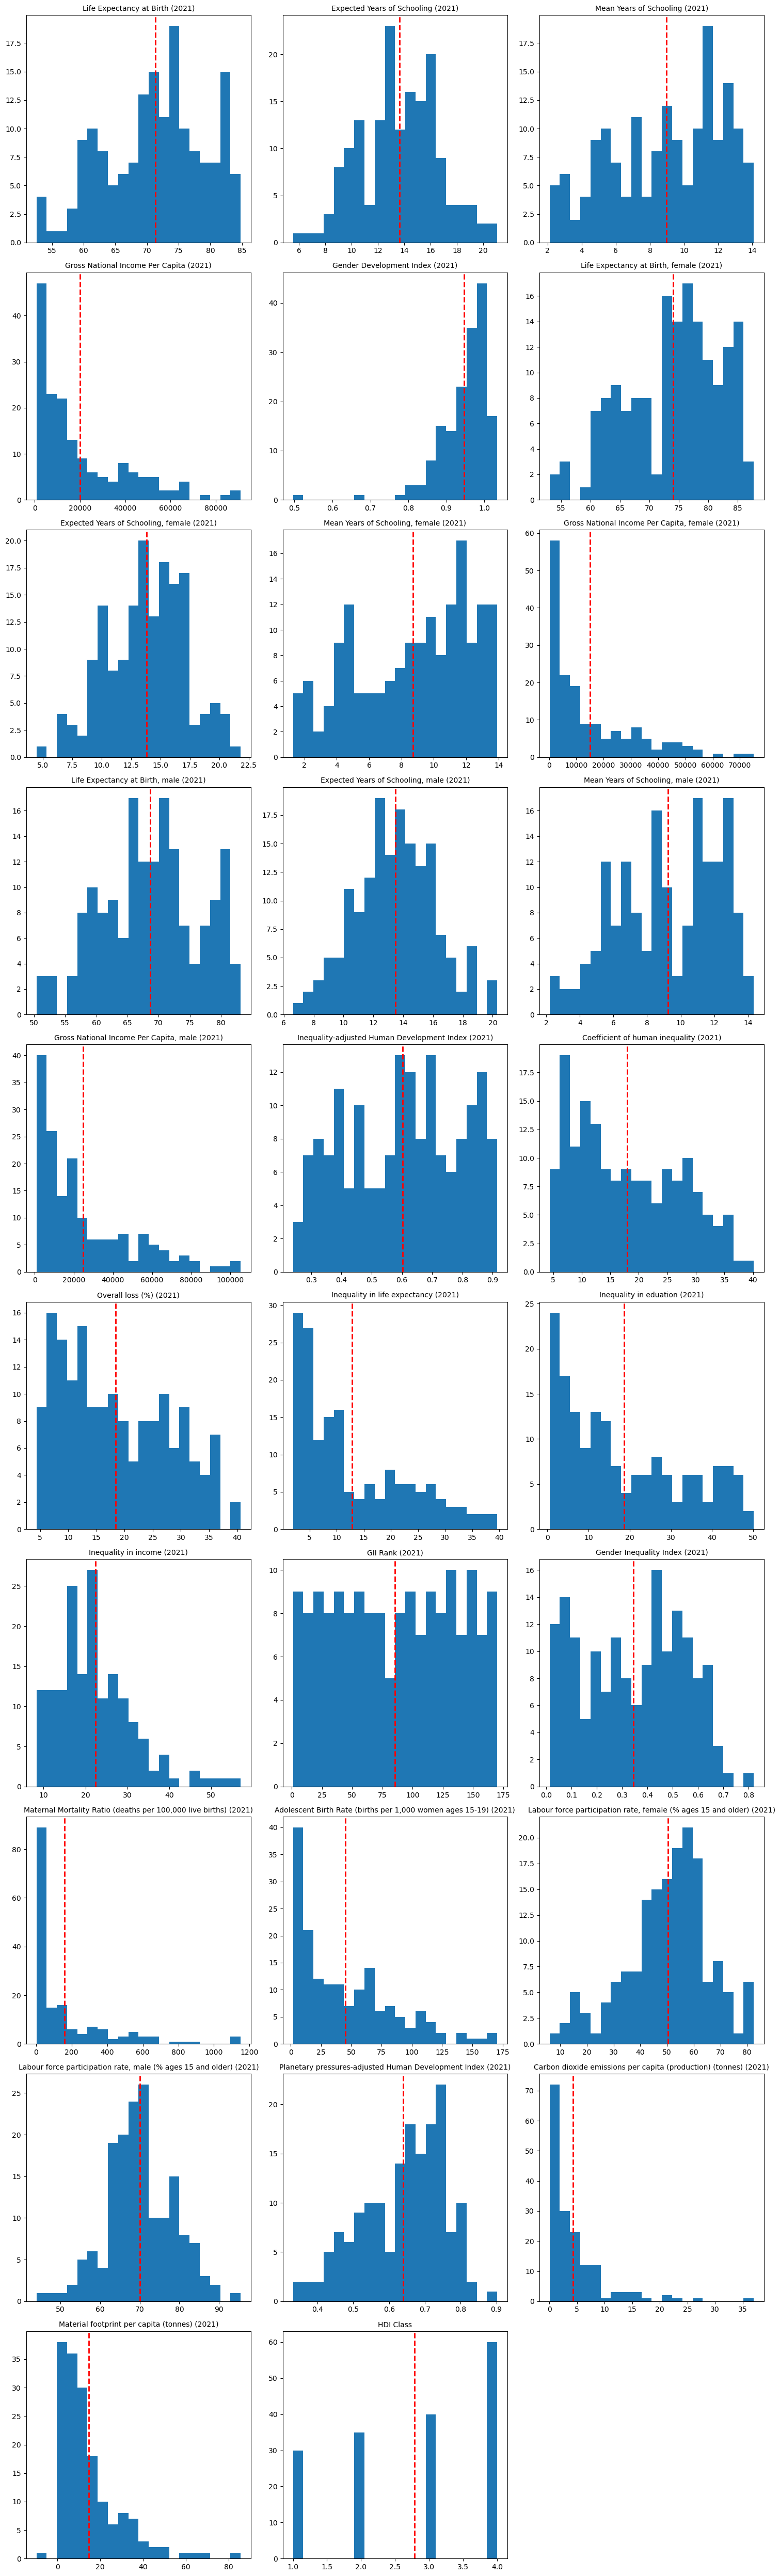

In [78]:
#Visually Checking for normal distribution condition for features in df2


num_cols = len(df2.columns)
num_rows = int(np.ceil(num_cols / 3))  # Adjust the number of rows and columns as needed
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

for i, col in enumerate(df2.columns):
    ax = axes[i // 3, i % 3]
    ax.hist(df2[col], bins=20) 
    data = df2[col]
    mean_value = data.mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)
    ax.set_title(str(col), fontsize = 10)

# Hide any unused subplots
for j in range(i + 1, num_rows * 3):
    axes[j // 3, j % 3].axis('off')

plt.tight_layout()
plt.show()


In [79]:
# Conducting Shapiro-Wilk Test to check for normal distribution of each  feature

norm_col=[]

for column in df2.columns: 
    print(column)
    stat, p = stats.shapiro(df2[column])
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat:.3f}, p={p:.3f}')

    # Interpretation
    alpha = 0.05
    if p > alpha:
        norm_col.append(column)
        print(norm_col)
        print(f'{column} looks normally distributed (fail to reject H0)')
        print("\n")
    else:
        print(f'{column} does not look normally distributed (reject H0)')
        print("\n")

print("list of features that satisfy normal distribution condition:\n")
for i in norm_col:
    print(i)


Life Expectancy at Birth (2021)
Shapiro-Wilk Test for Life Expectancy at Birth (2021): Statistics=0.972, p=0.002
Life Expectancy at Birth (2021) does not look normally distributed (reject H0)


Expected Years of Schooling (2021)
Shapiro-Wilk Test for Expected Years of Schooling (2021): Statistics=0.994, p=0.757
['Expected Years of Schooling (2021)']
Expected Years of Schooling (2021) looks normally distributed (fail to reject H0)


Mean Years of Schooling (2021)
Shapiro-Wilk Test for Mean Years of Schooling (2021): Statistics=0.948, p=0.000
Mean Years of Schooling (2021) does not look normally distributed (reject H0)


Gross National Income Per Capita (2021)
Shapiro-Wilk Test for Gross National Income Per Capita (2021): Statistics=0.832, p=0.000
Gross National Income Per Capita (2021) does not look normally distributed (reject H0)


Gender Development Index (2021)
Shapiro-Wilk Test for Gender Development Index (2021): Statistics=0.802, p=0.000
Gender Development Index (2021) does not l

----------------------------------

### **Analysis of Histograms and Shapiro-Wilk Test**

Based on the histogram plots and the results of the Shapiro-Wilk test, we observe that most of our features do not appear to be normally distributed.

### Considerations for Linear Discriminant Analysis (LDA)

- **Normal Distribution Assumption**: 

  - The assumption of a normal distribution for each class in LDA is a theoretical ideal.
  - In practical machine learning applications, this assumption is not strictly mandatory.
  - LDA can be quite robust to moderate violations of the normality assumption.

### Key Takeaway

Even though the normal distribution is an underlying assumption in LDA, the method has shown robustness in cases where this assumption is moderately violated. Therefore, it can still be effectively used in our current scenario.

----------------------------------

## **Part 2**: Dimensionality Reduction with Linear Discriminant Analysis (LDA)

### **Part 2.a:** Dimensionality Reduction with Linear Desciminant Analysis

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=None, solver = 'eigen')

Xl = df2.drop('HDI Class', axis=1)  
yl = df2['HDI Class']

X_lda = lda.fit_transform(Xl, yl)


In [81]:
#LDA Explained Variance Ratios and LDA Components 

print("Explained Variance Ratios:")
for i, ratio in enumerate(lda.explained_variance_ratio_):
    print(f"LD {i+1}: {ratio:.3f}")

lda_columns = [f'LD{i+1}' for i in range(X_lda.shape[1])]
lda_df = pd.DataFrame(X_lda, columns=lda_columns)

country_names = df1.index
lda_df = pd.DataFrame(X_lda, index=country_names, columns=['LD1', 'LD2', 'LD3'])
lda_df['class'] = df2['HDI Class'].values

display(lda_df.head())

Explained Variance Ratios:
LD 1: 0.892
LD 2: 0.089
LD 3: 0.019


,LD1,LD2,LD3,class
Country (2021),,,,
Afghanistan,-14.642240,-6.675668,27.003442,1.0
Angola,-15.973125,-7.434941,28.906356,2.0
Albania,-20.876425,-9.222072,27.072654,3.0
United Arab Emirates,-23.851425,-5.675737,29.161459,4.0
Argentina,-22.632206,-8.583805,25.739279,4.0


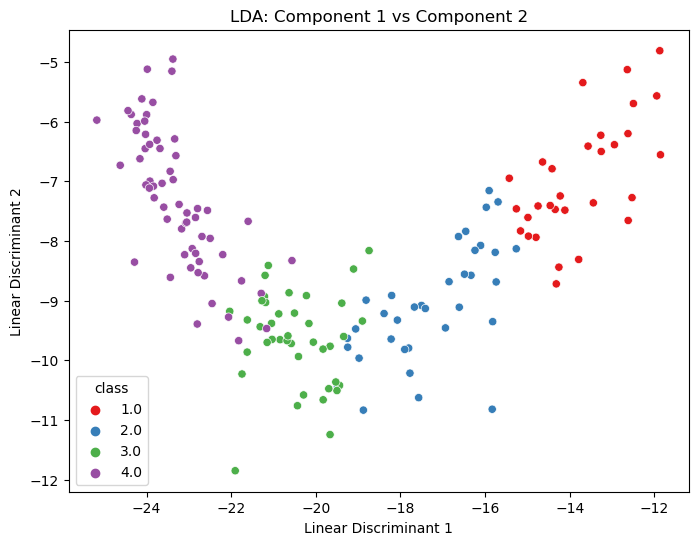

In [82]:
# LD1 vs LD2 scatter plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x='LD1', y='LD2', hue='class', data=lda_df, palette='Set1')
plt.title('LDA: Component 1 vs Component 2')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.show()

### **Part 2.b:** Principal Components Analysis Dimesionality Reduction

In [83]:
#Conducting PCA

from sklearn.preprocessing import StandardScaler
from fanalysis.pca import PCA

# Assuming df is your DataFrame

# Standardizing the features
x = StandardScaler().fit_transform(df2)

# Applying PCA
pca = PCA(n_components=8)  
pca.fit(x)

# Creating column names for each principal component
num_components = pca.row_coord_.shape[1] 
column_names = [f'PC{i+1}' for i in range(num_components)]

#Creating Dataframe with principal components
country_names = df1.index
principalComponents = pca.row_coord_
pca_df = pd.DataFrame(data=principalComponents, index= country_names, columns=column_names)

# Printing explained variance ratios
print("Explained Variance Ratios:")
eig_values = pca.eig_ 
for i in range(num_components):
    print(f"{column_names[i]}: {eig_values[1][i]:.2f}")


# Displaying the DataFrame with principal components
display(pca_df.head())


Explained Variance Ratios:
PC1: 68.82
PC2: 7.66
PC3: 5.38
PC4: 3.45
PC5: 3.31
PC6: 2.88
PC7: 1.86
PC8: 1.70


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Country (2021),,,,,,,,
Afghanistan,-7.125119,-0.564360,3.699354,0.550848,-0.462417,-0.834313,-1.627136,0.024028
Angola,-5.026217,1.112595,-1.483720,-0.239409,0.022151,-0.833517,-0.899795,0.061518
Albania,2.553413,-1.499318,-0.559552,-0.746788,-0.786030,0.118511,0.694897,-0.049037
United Arab Emirates,5.214641,3.917532,1.455602,-0.084008,1.153931,1.226028,-0.597228,0.027486
Argentina,2.890141,-0.738384,-1.257857,0.118685,1.070405,-0.828589,-0.825624,0.521746


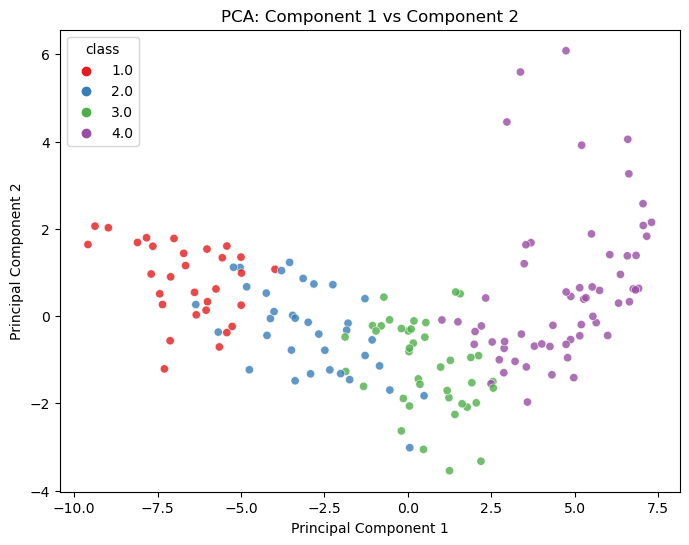

In [84]:
# PC1 vs PC2 Scatter Plot

pca_df['class'] = df2['HDI Class'].values

# Plotting the PCA-transformed features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette='Set1', alpha=0.8)

plt.title('PCA: Component 1 vs Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='class')
plt.show()

### ***Part 2.c:*** LDA vs PCA for dimensionality reduction

**LDA explained variance ratios:**

LDA Component 1: Captures 89.4% of the variance between classes.
LDA Component 2: Captures an additional 8.6% of the variance.
LDA Component 3: Captures an additional 1.9% of the variance.

These values suggest that the first LDA component is highly effective at separating the classes, with the second and third components adding relatively little additional separation.

**PCA Explained Variance Ratios:**

PC1: Captures 68.08% of the overall variance in the data.
PC2: Captures 7.66% of the variance.
PC3: Captures 5.34% of the variance.
PC4: Captures 3.64% of the variance.
PC5: Captures 3.30% of the variance.
PC6: Captures 3.01% of the variance.
PC7: Captures 1.96% of the variance.
PC8: Captures 1.75% of the variance.


The PCA components show a more gradual decline in the percentage of variance explained, with the first component being the most significant but less dominant compared to LDA's first component.

**Comparing LDA and PCA:**

Variance Focus: LDA focuses on class separability, which often makes the first few components very powerful for classification tasks. In contrast, PCA components are not designed for class separation but for capturing the most significant variance directions in the feature space.

**LDA Plot:**

- Class Separation: The LDA plot shows a clear separation between the classes along the first linear discriminant (LD1). This indicates that LDA has found a projection that maximizes the separation between the different classes effectively.

- Overlap: There's some overlap between classes 1 (red) and 2 (blue), suggesting that while LDA is effective, it may not completely distinguish all classes.

- Compactness: Classes 3 (green) and 4 (purple) are more compact, indicating that they are more homogeneous within themselves compared to classes 1 and 2.


**PCA Plot:**

- Variance: The PCA plot shows the spread of data points primarily along the first principal component (PC1), which captures the most variance. The second principal component (PC2) captures less variance.

- Class Distribution: Unlike LDA, PCA does not consider class labels for maximizing variance, which is why the classes are not as distinct. The classes show more mixing and less separation, indicating that PCA's goal is variance, not class separability.

- Overlap: There's considerable overlap among all classes. The structure within the data is less clear in terms of class differentiation, which is expected because PCA does not utilize class information.

## **Part 3: Classification with Linear Discriminant Analysis (LDA)**

In [85]:
#Conducting Classification using LDA classification model from sklearn

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


X= df2.drop(columns="HDI Class")
y=df2['HDI Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

#Calculate Accuracy Score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}\n')

# Perform 5-fold cross-validation

cv_scores = cross_val_score(lda, X, y, cv=5)

print(f'Cross-validation Scores: {cv_scores}')
print(f'Average CV Score: {np.mean(cv_scores)}')


Accuracy Score: 0.696969696969697

Cross-validation Scores: [0.75757576 0.78787879 0.81818182 0.66666667 0.75757576]
Average CV Score: 0.7575757575757576


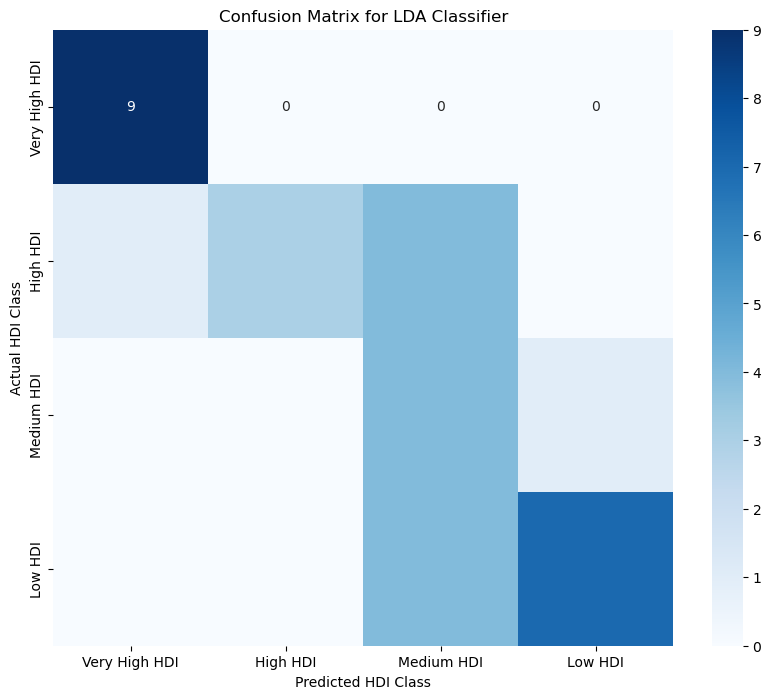

              precision    recall  f1-score   support

         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.38      0.55         8
         3.0       0.33      0.80      0.47         5
         4.0       0.88      0.64      0.74        11

    accuracy                           0.70        33
   macro avg       0.78      0.70      0.68        33
weighted avg       0.83      0.70      0.71        33



In [86]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn's heatmap

plt.figure(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Very High HDI", 'High HDI', 'Medium HDI', 'Low HDI'], 
            yticklabels=["Very High HDI", 'High HDI', 'Medium HDI', 'Low HDI'])

plt.ylabel('Actual HDI Class')
plt.xlabel('Predicted HDI Class')
plt.title('Confusion Matrix for LDA Classifier')
plt.show()

precision = precision_score(y_test, y_pred, average=None)  
recall = recall_score(y_test, y_pred, average=None) 

# Print Classification Report

print(classification_report(y_test, y_pred))


----------------------------------

## **Model Evaluation:**

### Linear Discriminant Analysis (LDA) Performance as a Classifier:

- LDA performs reasonably well for Human Development Index (HDI) classification.


- The application of LDA in classifying the Human Development Index (HDI) demonstrates its efficacy in practical scenarios, affirming its robustness and versatility as a classification tool.

----------------------------------
